

```
Assignment 1, part B - Circuit 1
Author: Abdullah Wasiq
```

I begin by adding my imports:

In [ ]:
%matplotlib inline
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit_aer.library import SaveStatevector
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np

Creating the Quantum Ciruit:

1. Initialize the circuit with ```qc = QuantumCircuit(4, 4)```, creating 4 qubits.
2. Apply Hadamard Gates to q0, q1, and q2; ```qc.h([0, 1, 2])```
3. Apply a NOT gate to q3, then a Hadamard to it after it's inverse; Then I add a barrier.
4. I then create CNOT gates with q3 being the target of each one. [0 -> 3, 1 -> 3, 2 -> 3], and then add another barrier;
5. Finally, I reapply Hadamard gates to q0,q2,q1. (But not q3)




In [18]:
qc = QuantumCircuit(4, 3)
qc.h([0, 1, 2])

qc.x(3)
qc.h(3)

qc.barrier()

qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(2, 3)

qc.barrier()

qc.h([0, 1, 2])

Then I draw out the circuit using ```qc.draw('mpl')```

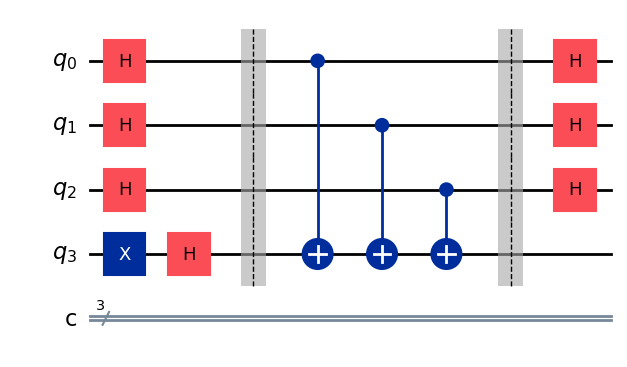

In [19]:
qc.draw('mpl')

I then need to simulate the circuit using qiskit-aer and plot the histogram, which gives us the partial output states of the circuit. I applied measurements to q1, q2, q0.

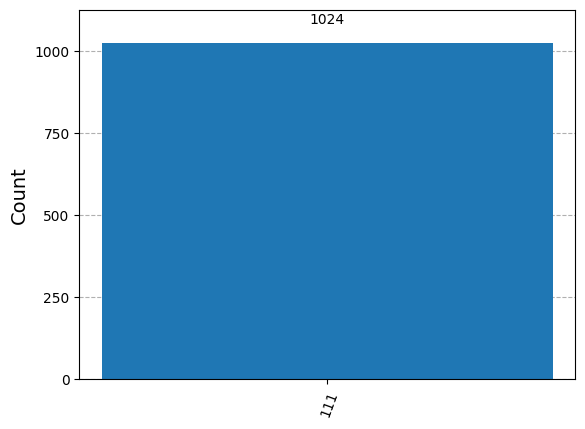

In [20]:
qc.measure([0, 1, 2], [0, 1, 2])

simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()

plot_histogram(counts)

Our final partial output state is ```|111⟩```


Here is the entire program in a seperate code box:

In [ ]:
%matplotlib inline
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit_aer.library import SaveStatevector
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np

qc = QuantumCircuit(4, 4)
qc.h([0, 1, 2])

qc.x(3)
qc.h(3)

qc.barrier()

qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(2, 3)

qc.barrier()

qc.h([0, 1, 2])
qc.draw('mpl')
qc.measure([0, 1, 2], [0, 1, 2])

simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()

plot_histogram(counts)